In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot
import statsmodels.formula.api as smf

In [7]:
#read data
cars = pd.read_csv(r"C:\Users\bubbl\Downloads\Cars.csv")
cars.head

<bound method NDFrame.head of      HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]>

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [10]:
#ch3ck for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [11]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


<Axes: xlabel='HP', ylabel='MPG'>

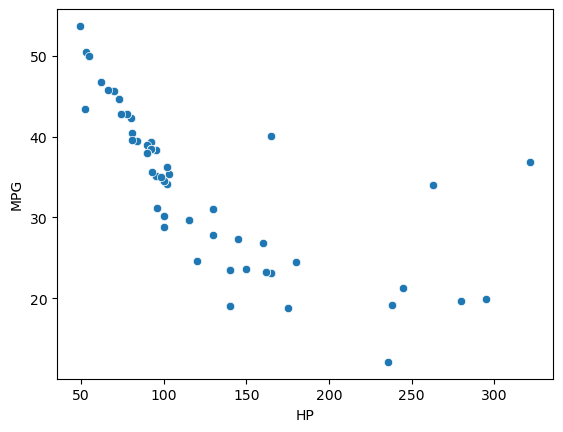

In [12]:
sns.scatterplot(x=cars['HP'],y=cars['MPG'])

<Axes: xlabel='VOL', ylabel='SP'>

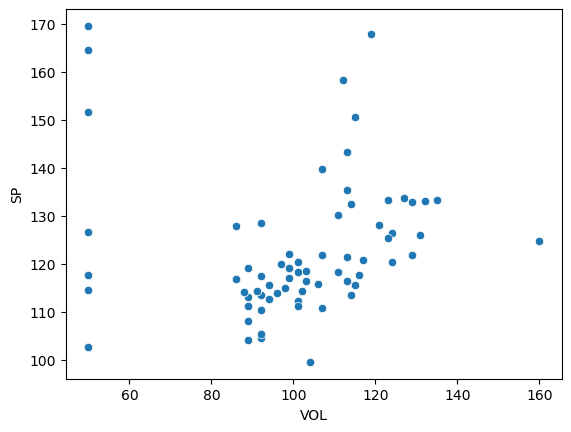

In [13]:
sns.scatterplot(x=cars['VOL'],y=cars['SP'])

<Axes: xlabel='SP', ylabel='WT'>

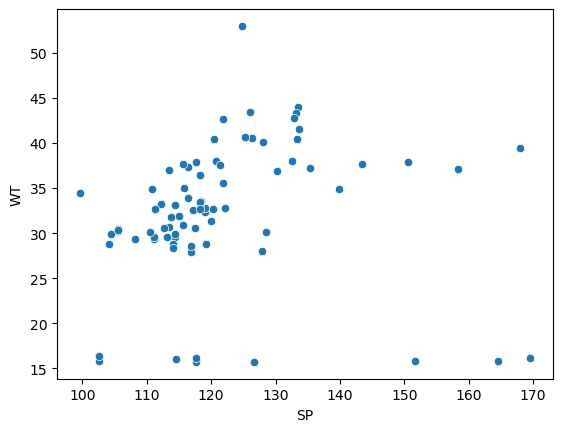

In [14]:
sns.scatterplot(x=cars['SP'],y=cars['WT'])

In [15]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


NameError: name 'plt' is not defined

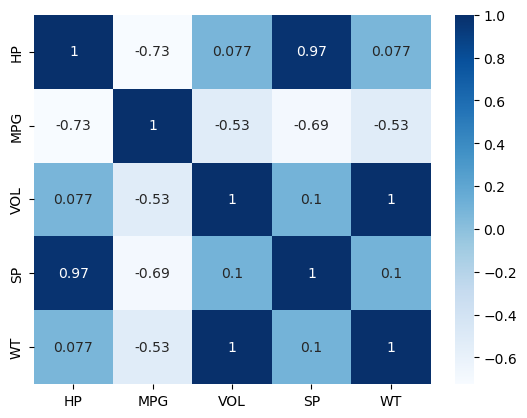

In [16]:
sns.heatmap(cars.corr(),cmap='Blues',annot=True)
plt.show

In [17]:
cars.describe

<bound method NDFrame.describe of      HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]>

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

cars[['HP','WT','VOL','SP']]=sc.fit_transform(cars[['HP','WT','VOL','SP']])

In [19]:
np.round(cars.describe(),3)

,HP,MPG,VOL,SP,WT
count,81.000,81.000,81.000,81.000,81.000
mean,-0.000,34.422,0.000,0.000,0.000
std,1.006,9.131,1.006,1.006,1.006
min,-1.206,12.101,-2.200,-1.559,-2.243
25%,-0.590,27.856,-0.441,-0.547,-0.379
50%,-0.308,35.153,0.101,-0.236,0.043
75%,0.397,39.532,0.642,0.345,0.669
max,3.603,53.701,2.763,3.410,2.764


In [20]:
import statsmodels.formula.api as smf
ml_vol=smf.ols('MPG~VOL',data=cars).fit()
np.round(ml_vol.rsquared,2)

0.28

In [21]:
ml_vol.params

Intercept    34.422076
VOL          -4.801137
dtype: float64

In [22]:
sp_wt=smf.ols('SP~WT',data=cars).fit()
np.round(sp_wt.rsquared,2)

0.01

In [24]:
#build the model
import statsmodels.formula.api as smf

model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [25]:
np.round(model.rsquared,2)

0.77

In [27]:
MGP=0.89*WT-0.88*VOL+0.66*SP-1.34*HP+0.898

NameError: name 'WT' is not defined